## Installing YOLOv4/Darknet
=============================================

### Step 1: Install the Prerequisite

1. **CMake:** Download and Install Cmake from the Link. [[https://cmake.org/download/](https://cmake.org/download/)]
2. **CUDA:** Download and Install CUDA from the Link. [[https://developer.nvidia.com/cuda-downloads](https://developer.nvidia.com/cuda-downloads)]
3. **cuDNN:** Download and Install cuDNN from the Link. [[https://developer.nvidia.com/cudnn-download-survey](https://developer.nvidia.com/cudnn-download-survey)]
4. **OpenCV:** Run `pip install opencv-python` and Install OpenCV
5. **Visual Studio Community Edition:** Download Visual Studio from the Link and Install [[Microsoft Visual Studio Community Edition]](https://visualstudio.microsoft.com/thank-you-downloading-visual-studio/?sku=Community&rel=16)
    - While installing, Make Sure you choose **_Desktop Development with C++_** under the **Workloads** tab
6. **Powershell Command:** Open Powershell and execute the following command `Set-ExecutionPolicy unrestricted -Scope CurrentUser -Force`

### Step 2: Preparation for Installing Darknet

1. Open `install_darknet.py` in your favorite editor.
2. Find `VIRTUAL_ENV` and replace the value depending on your environment.
    - If you are using a Virtual Environment, set the **name of the environment** as the value of `VIRTUAL_ENV`
    - If you are not using any virtual environment, left the value of `VIRTUAL_ENV` blank

### Step 3: Installing Darknet

Go into the project directory and open powershell in the current folder. Now run `python install_darknet.py` to start installing darknet. As the installation may take a long time (1-2 hours), please don't panic and stop the execution of the script.

### Step 4: Removing the Garbage Files

After successfully installing the Darknet, Please check the followings:

1. Your project directory should contain `darknet` folders inside.
2. Start powershell in the project directory and run `python` to start interactive shell. Then try to import darknet using `import darknet`. If you don't see any error, Your installation is successful.

After successful running of the script, you will see a Windows explorer pop up from where delete the **darknet** folder.

**Congratulations, You can now use Darknet in your Projects**

## Detecting Objects Using Pre-Trained Model
===============================================================

1. Download Pre-Trained Configuration File From This Link: [https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg](https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg)
2. Put the Configuration File in the **`darknet\cfg`** Directory.
3. Download Pre-Trained Weights File from This Link: [https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights](https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights)
4. Put the Weights File in the **`darknet\`** Directory

### Importing Libraries

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import glob

from darknet import darknet

### Defining Directories

In [2]:
project_dir = os.getcwd()
darknet_dir = os.path.join(project_dir, 'darknet')

### Loading YOLOv4 Network

In [3]:
os.chdir(darknet_dir)
network, class_names, class_colors = darknet.load_network(
    'cfg/yolov4.cfg',
    'cfg/coco.data',
    'yolov4.weights'
)

### Loading Image for Detection

In [12]:
image_location = 'data/dog.jpg'

width = darknet.network_width(network)
height = darknet.network_height(network)
darknet_image = darknet.make_image(width, height, 3)

image = cv2.imread(image_location)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (width, height), interpolation=cv2.INTER_LINEAR)
darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())

369664

### Detecting Objects in the Image

In [13]:
detections = darknet.detect_image(network, class_names, darknet_image, thresh=0.35)
darknet.free_image(darknet_image)

1

In [23]:
print(detections)

[('truck', '91.8', (454.57421875, 130.06637573242188, 174.901611328125, 98.58246612548828)), ('bicycle', '92.38', (271.9219970703125, 292.3072814941406, 362.61602783203125, 315.59527587890625)), ('dog', '97.91', (174.85946655273438, 404.4503173828125, 146.0295867919922, 333.9118347167969))]


### Saving the Viewing the Image

In [17]:
os.chdir(project_dir)
image = darknet.draw_boxes(detections, image_resized, class_colors)
cv2.imwrite('output.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

True

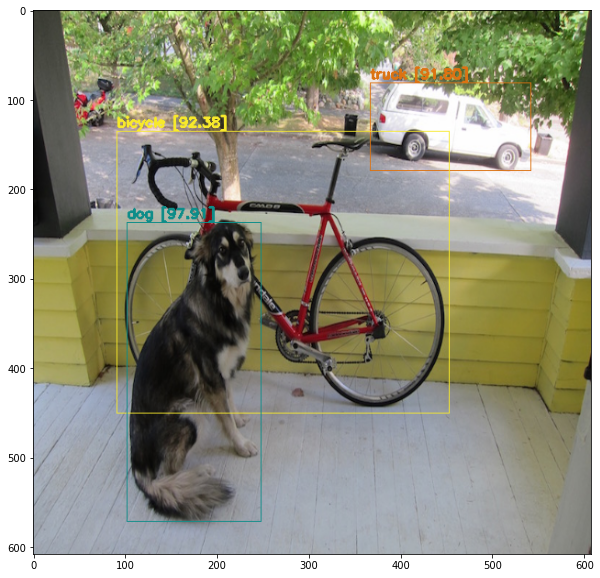

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(image, aspect='auto')
plt.show()